In [3]:
__author__ = 'zhengwei17'
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

In [4]:
poi_data = pd.read_csv(r'C:\Users\zhengwei17\Downloads\data (10).csv')

In [7]:
poi_data.dtypes

商家ID           int64
门店名称          object
首购用户数        float64
商家实际交易额      float64
总提单数           int64
总推单数           int64
商家活动承担成本     float64
商家活动实际交易额    float64
dtype: object

In [6]:
poi_data['首购用户数'] = poi_data['首购用户数'].astype('float64')

In [3]:
print(poi_data.head())

      商家ID             门店名称  首购用户数       商家实际交易额  总提单数  总推单数      商家活动承担成本  \
0   479022  Q堡堡【松田学院分店】备注短号     21  34432.650022  2113  1784  17212.849985   
1   515618           aicake      2  22165.500000   792   686    179.000000   
2    96518              麦德味     95   4672.499999   469   352    115.000001   
3  1538780            蜀将军鸭货      0    523.000000    23    17      0.000000   
4  1121180          果然鲜水果超市      1   1637.319988   104    89      6.000000   

      商家活动实际交易额  
0  33681.150022  
1  11862.000000  
2   1347.499999  
3    217.000000  
4    384.089996  


In [4]:
print(poi_data.tail())

        商家ID             门店名称  首购用户数       商家实际交易额  总提单数  总推单数     商家活动承担成本  \
995  1383319     镇京老鸭粉丝汤（钟秀店）      3   6299.889961   350   315  1205.609995   
996   100819             曹氏鸭脖      0      0.000000     0     0     0.000000   
997   158206             土鸡泡馍      5    402.000000    44    33     0.000000   
998    67606  优米客黄焖鸡米饭（公交车站店）     10  11288.000000   709   624   588.000000   
999   397743            淘堡汉堡店     11   7457.799982   552   480  1479.199995   

        商家活动实际交易额  
995   5861.189966  
996      0.000000  
997    146.000000  
998  10902.000000  
999   6912.299982  


In [7]:
summary = poi_data.describe()
print (summary)

               商家ID        首购用户数        商家实际交易额          总提单数          总推单数  \
count  1.000000e+03  1000.000000    1000.000000   1000.000000   1000.000000   
mean   9.213388e+05    14.693000   12966.630663    772.035000    673.284000   
std    6.541492e+05    26.015102   24360.859939   1299.109591   1148.154088   
min    2.742000e+03     0.000000       0.000000      0.000000      0.000000   
25%    1.879262e+05     1.000000    1070.000000     62.750000     53.750000   
50%    8.993505e+05     5.000000    4665.250000    288.500000    248.000000   
75%    1.548337e+06    16.250000   13983.674992    874.000000    750.500000   
max    2.058390e+06   213.000000  362488.319588  12945.000000  11954.000000   

           商家活动承担成本      商家活动实际交易额  
count   1000.000000    1000.000000  
mean    2495.190772    8928.857493  
std     7114.484874   19378.576624  
min        0.000000       0.000000  
25%        0.000000     243.375000  
50%      173.250000    1772.399993  
75%     1633.125000    8179.0

In [ ]:
summary

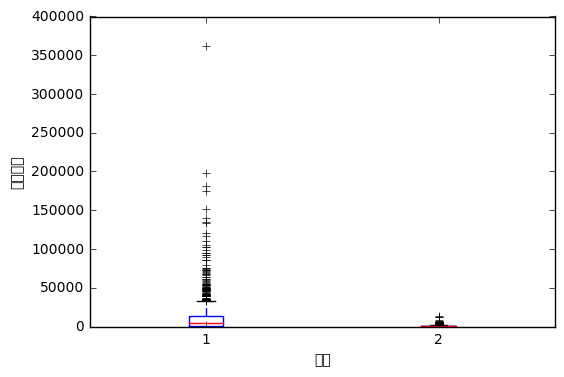

In [22]:
#箱型图分析
#选取你想要的列
array = poi_data.iloc[:,3:5].values
boxplot(array)
plot.xlabel("属性")
plot.ylabel("四分位距")
show()

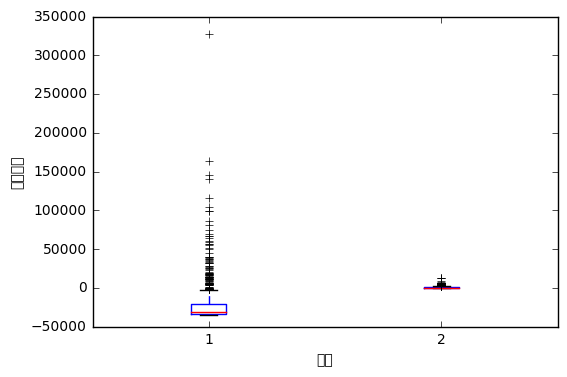

In [26]:
#对数据进行归一化，因为这个偏差真他妈大
poi_dataNormalized = poi_data.iloc[:,3:5]

for i in range(2):
    mean = summary.iloc[1,i]
    sd = summary.iloc[2,1]
    poi_dataNormalized.iloc[:,i:(i + 1)] = poi_dataNormalized.iloc[:,i:(i + 1)] - mean / sd
array3 = poi_dataNormalized.values
boxplot(array3)
plot.xlabel("属性")
plot.ylabel("四分位距")
show()

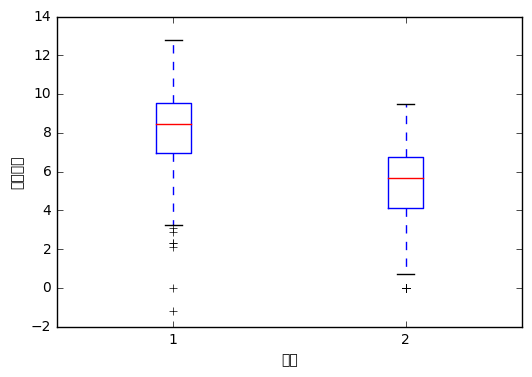

In [10]:
#我们在这里仍然表示不信邪，取对数试试
poi_dataNormalized = poi_data.iloc[:,3:5]

array4 = log(poi_data.iloc[:,3:5]).values

boxplot(array4)
plot.xlabel("属性")
plot.ylabel("四分位距")
show()

In [ ]:
#-*- coding: utf-8 -*-
#菜品盈利数据 帕累托图
from __future__ import print_function
import pandas as pd

#初始化参数
dish_profit = 'E:/PythonMaterial/chapter3/chapter3/demo/data/catering_dish_profit.xls' #餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = u'菜品名')
data = data[u'盈利'].copy()#把data的盈利这一列抓出来
data.sort(ascending = False)#降序排列

import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure()#建立图像
#plot函数用来绘制线性二维图，折线图；kind用来指定作图类型，bar指的是条形图
data.plot(kind='bar')
plt.ylabel(u'盈利（元）')
#sum()是计算样本的总和；cumsum()是依次给出前1,2,3.。。n个数的和
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel(u'盈利（比例）')
plt.show()